**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [4]:
df= pd.read_csv("2classdata.csv")


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [6]:
#Look at the head and tail of dataset.
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [7]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [8]:
#Find the missing value
F=df.isna().sum()
F
#conclusion = we dont have any missing values

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [27]:
#Look at the distribution of class values and other attributes.
#Look at the unique values of class values
df1 = df.groupby(["class"])
df1.count() #gives the count of the group

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
Normal,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683


In [28]:
#Look at the unique values of class values.
#Look at the distribution of class values and other attributes.
df1.first() #gives the first values from the group

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
Normal,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683


In [30]:
#Get the datatype information about the dataset 
df.dtypes #gives only the datatype information

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [31]:
#Get the datatype information about the dataset 
df.info() #gives all the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [34]:
df.shape #gives the total number of records in the dataset against the total number of columns in the dataset

(310, 7)

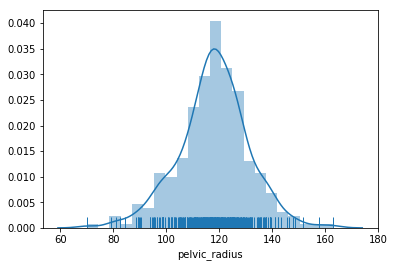

In [8]:
#Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization - to be completed

sns.distplot(df['pelvic_radius'], kde=True, rug=True)


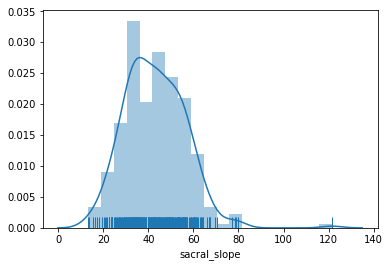

In [9]:
sns.distplot(df['sacral_slope'], kde=True, rug=True)

# Encode the Class variable to integer.

In [89]:
#method 1
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
#df['class'] = number.fit_transform(df['class'].astype('int')) #both are same, when you put as 'str' its converting to int 32, as int its int64
df['class'] = number.fit_transform(df['class']) #when nothing its int64 model of converting to 0,1 for string/object variable
df.sample(10)
df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

In [90]:
#method 2
df['class'] = df['class'].astype('category') #  error message was thrown (invalid syntax) when using the syntax 
                                              #- df['class'] = df.class.astype('category') 
                                                         #when you do this you need to use get dummmies function to change the variables
df.dtypes 
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

#Feature - set - X - is what the input which we give i.e. here input is all the columns - except class colummn
#Target - Set- y - is what the output/inferences which we get from the input data - output data is class column which we conclude whether the record is
normal and abnormal 

In [91]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df.drop(labels= "class" , axis = 1)
X.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [92]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 
y = df[["class"]] # here we dont need to convert anything to 0 and 1s as everything is already converted in above steps using label encoder
y.head()

,class
0,0
1,0
2,0
3,0
4,0


# Normalize your Data (X) to get values between 0 to 1.

In [53]:
#Applying zscore to normalise the data
X_old = X.apply(zscore)
X_old.describe().T  #mean is not around 0 and std is not around 1 - on applying Z score

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-1.231989e-16,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic_tilt numeric,310.0,-4.132895e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,3.212484e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,2.664535e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,3.674480e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,1.088735e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350


In [54]:
#since zscore values are not between 0 and 1, hence applying maximum and minimum scalar value
from sklearn.preprocessing import MinMaxScaler # importing the item from the library
scaler = MinMaxScaler()                     #storing the item in a variable
x_scaled = scaler.fit_transform(X)          #fitting and transforming the values from X and storing it in a variable x_scaled
x_scaled                                    #x_scaled is a array now

array([[0.35568788, 0.51989984, 0.22917997, 0.2508573 , 0.30746116,
        0.02514839],
       [0.12450104, 0.2967831 , 0.09857833, 0.14462935, 0.47664891,
        0.03636497],
       [0.41166648, 0.51393229, 0.32299466, 0.30766054, 0.38609692,
        0.0175229 ],
       ...,
       [0.34043781, 0.52244298, 0.28789745, 0.23490726, 0.59779618,
        0.01943732],
       [0.18425678, 0.27235174, 0.24684569, 0.21462279, 0.52117504,
        0.02624045],
       [0.07420202, 0.20770855, 0.20261992, 0.14251659, 0.57924032,
        0.02527676]])

In [93]:
#since zscore values are not between 0 and 1, hence applying maximum and minimum scalar value
from sklearn.preprocessing import MinMaxScaler # importing the item from the library
scaler = MinMaxScaler()                     #storing the item in a variable
x_scaled = scaler.fit_transform(X)          #fitting and transforming the values from X and storing it in a variable x_scaled(will be a array)
X = pd.DataFrame(x_scaled)                  #converting the array x_scaled into a dataframe and storing it in X
#X.columns=['pelvic_incidence',
#'pelvic_tilt numeric',
#'lumbar_lordosis_angle',
#'sacral_slope',
#'pelvic_radius',
#'degree_spondylolisthesis']
X.describe().T

,count,mean,std,min,25%,50%,75%,max
0,310.0,0.331276,0.166237,0.0,0.195613,0.313862,0.450685,1.0
1,310.0,0.430419,0.178762,0.0,0.307608,0.409251,0.512180,1.0
2,310.0,0.339450,0.166043,0.0,0.205831,0.318253,0.438509,1.0
3,310.0,0.273794,0.124216,0.0,0.184895,0.268714,0.363946,1.0
4,310.0,0.514452,0.143215,0.0,0.436900,0.518189,0.595613,1.0
5,310.0,0.086952,0.087428,0.0,0.029474,0.053133,0.121847,1.0


In [55]:
#since zscore values are not between 0 and 1, hence applying maximum and minimum scalar value
from sklearn.preprocessing import MinMaxScaler # importing the item from the library
scaler = MinMaxScaler()                     #storing the item in a variable
x_scaled = scaler.fit_transform(X)          #fitting and transforming the values from X and storing it in a variable x_scaled(will be a array)
X = pd.DataFrame(x_scaled)                  #converting the array x_scaled into a dataframe and storing it in X
X.columns=['pelvic_incidence',              #specifying the columns accordingly for the new dataset X
'pelvic_tilt numeric',
'lumbar_lordosis_angle',
'sacral_slope',
'pelvic_radius',
'degree_spondylolisthesis']
X.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,0.331276,0.166237,0.0,0.195613,0.313862,0.450685,1.0
pelvic_tilt numeric,310.0,0.430419,0.178762,0.0,0.307608,0.409251,0.512180,1.0
lumbar_lordosis_angle,310.0,0.339450,0.166043,0.0,0.205831,0.318253,0.438509,1.0
sacral_slope,310.0,0.273794,0.124216,0.0,0.184895,0.268714,0.363946,1.0
pelvic_radius,310.0,0.514452,0.143215,0.0,0.436900,0.518189,0.595613,1.0
degree_spondylolisthesis,310.0,0.086952,0.087428,0.0,0.029474,0.053133,0.121847,1.0


# Split the dat as train and test with a ratio of 70:30.

In [56]:
test_size = 0.30 # taking 70:30 training and test set X- 70% of the data - Train data, y - 30% of the data which is test data
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [57]:
print(X_train.shape,y_train.shape) #The volume of the train data
print(X_test.shape,y_test.shape) #The volume of the test data

(217, 6) (217, 1)
(93, 6) (93, 1)


In [58]:
print(X_train.shape,X_test.shape) #the Feature dataset
print(y_train.shape,y_test.shape) #the target dataset 

(217, 6) (93, 6)
(217, 1) (93, 1)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [94]:
NNH = KNeighborsClassifier()
NNH.fit(X_train, y_train)

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [95]:
predicted_labels = NNH.predict(X_test) #here the accuracy score is predicted for neighbor = 5 i.e. k = 5

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [96]:
NNH.score(X_test, y_test)

0.7526881720430108

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

#finding the best k is the square root of number of elements present in the train data


bestk=np.sqrt(X_train) #gives the root of entire values in the X_train
bestk

In [62]:
bestk=np.sqrt(X_train.shape[0]) #Clubs all the values of X_train and gives a single values in decimal values
bestk

14.730919862656235

In [63]:
bestk=int(np.sqrt(X_train.shape[0])) #Clubs all the values of X_train and gives a single values in a interger( without decimal values)
bestk

14

In [64]:
dict={}
for x in range(1,14,2):
    NNH = KNeighborsClassifier(n_neighbors=x)
    NNH.fit(X_train, y_train)
    predicted_labels=NNH.predict(X_test)
    #NNH.score(x_test, y_test)
    dict[x]=NNH.score(X_test, y_test)

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [65]:
dict

{1: 0.7741935483870968,
 3: 0.7526881720430108,
 5: 0.7634408602150538,
 7: 0.8172043010752689,
 9: 0.8064516129032258,
 11: 0.8172043010752689,
 13: 0.8172043010752689}

In [67]:
print("Optimal k is based on test accuracy is: ", max(dict,key=dict.get))

Optimal k is based on test accuracy is:  7


In [98]:
#deriving optimal k based on the train accuracy
dict={}
for x in range(3,14,2):
    NNH = KNeighborsClassifier(n_neighbors=x)
    NNH.fit(X_train, y_train)
    predicted_labels=NNH.predict(X_train)
    #NNH.score(x_test, y_test)
    dict[x]=NNH.score(X_train, y_train)

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_la

In [99]:
dict                            #1 is not a possible value hence we can pick 90% optimal k is 3 for the train accuracy

{3: 0.9078341013824884,
 5: 0.8571428571428571,
 7: 0.8433179723502304,
 9: 0.8202764976958525,
 11: 0.8018433179723502,
 13: 0.7972350230414746}

In [100]:
print("Optimal k is based on train accuracy: ", max(dict,key=dict.get))

Optimal k is based on train accuracy:  3


In [97]:
maxK = int(np.sqrt(X_train.shape[0]))     #another code to predict the train accuracy/Test accuracy                           
optimalK = 3
optimalTrainAccuracy = 0

for k_i in range(maxK):
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(X_train, y_train)
        if(KNN.score(X_train, y_train) > optimalTrainAccuracy):
            optimalK = k_i
            optimalTrainAccuracy = KNN.score(X_train, y_train)
print((optimalK, optimalTrainAccuracy))

(3, 0.9078341013824884)


C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8:

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [10]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

In [11]:
df1 = pd.read_csv("3classdata.csv")

In [78]:
F=df.isna().sum()
F

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [135]:
df2 = df1.groupby(["class"])
df2.count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [137]:
df1['class'] = df1['class'].astype('category') 
df1.dtypes

pelvic_incidence             float64
pelvic_tilt                  float64
lumbar_lordosis_angle        float64
sacral_slope                 float64
pelvic_radius                float64
degree_spondylolisthesis     float64
class                       category
dtype: object

In [79]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df1['class'] = number.fit_transform(df1['class'])
df1.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int32
dtype: object

In [80]:
df1.sample()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
165,83.703177,20.268229,77.110598,63.434949,125.480174,69.279571,2


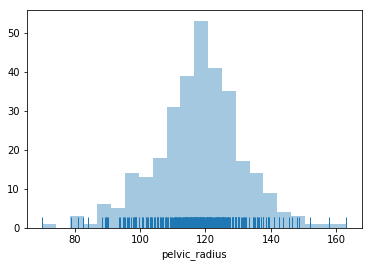

In [13]:
sns.distplot(df1['pelvic_radius'], kde=False, rug=True)

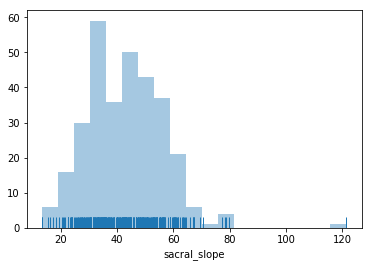

In [15]:
sns.distplot(df1['sacral_slope'], kde=False, rug=True)

In [81]:
X = df1.drop(labels= "class" , axis = 1)
X = X.apply(zscore)  # convert all attributes to Z scale 
y = df1[["class"]]
y = pd.get_dummies(y, drop_first=True)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
NNH = KNeighborsClassifier()
NNH.fit(X_train, y_train) ## Training the model
print(("Train accuracy: ", NNH.score(X_train, y_train))) ## Train accuracy
print(("Test accuracy: ", NNH.score(X_test, y_test)))

('Train accuracy: ', 0.8571428571428571)
('Test accuracy: ', 0.7526881720430108)


C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [82]:
bestk=int(np.sqrt(X_train.shape[0])) #Clubs all the values of X_train and gives a single values in a interger( without decimal values)
bestk

14

In [83]:
dict={}
for x in range(1,15,2):
    NNH = KNeighborsClassifier(n_neighbors=x)
    NNH.fit(X_train, y_train)
    predicted_labels=NNH.predict(X_test)
    #NNH.score(x_test, y_test)
    dict[x]=NNH.score(X_test, y_test)

C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\Nachiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [84]:
dict

{1: 0.7956989247311828,
 3: 0.7419354838709677,
 5: 0.7526881720430108,
 7: 0.7741935483870968,
 9: 0.7741935483870968,
 11: 0.8064516129032258,
 13: 0.8279569892473119}

In [85]:
print("Optimal k is based on test accuracy: ", max(dict,key=dict.get))

Optimal k is based on test accuracy:  13
